# Lab 05
## Sam Bacon - February 24, 2021
### Hyperparameter Search


In [ ]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns;
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
# Read in dataset and display rows
customers = pd.read_csv('videostore_2.csv', index_col=0)
customers.head(5)

# Dummy variables 
customers_2 = pd.get_dummies(customers)
customers_2.head(5)

# Min-max normalization
X_norm = (customers_2 - customers_2.min()) / (customers_2.max()-customers_2.min())
customers_2.head(10)

FileNotFoundError: ignored

In [ ]:
# Building the model
X = X_norm[['Income', 'Age', 'Rentals','Avg Per Visit','Gender_M','Gender_F','Genre_Action','Genre_Comedy','Genre_Drama']].values
y = customers['Incidentals'].astype('category').cat.codes.values
print('X shape:', X.shape, '   y shape:', y.shape)



X shape: (50, 9)    y shape: (50,)


In [ ]:
# Split data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Train model and predict
model = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
model.fit(Xtrain, ytrain)

ypred = model.predict(Xtest)

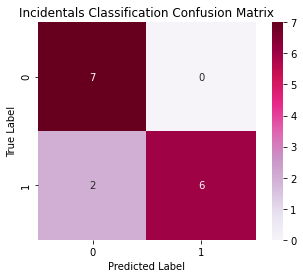

In [ ]:
# Confusion matrix
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="PuRd",
                    xticklabels=model.classes_,
                    yticklabels=model.classes_)

plt.xlabel('Predicted Label');
plt.ylabel('True Label')
plt.title('Incidentals Classification Confusion Matrix')
plt.show()

In [ ]:
# Classification report
from sklearn.metrics import classification_report

# Print results
print(classification_report(ytest, ypred))

NameError: ignored

### Responses

#### Precision

The precision for class 0 is 0.78. This indicates that when the model predicted that a customer would not make a purchase, the predictions were correct 78% of the time.

Calculating precision: 7/(7+2) = 7/9 = 0.78

#### Recall

The recall for class 1 is 0.75. This suggests that when we consider all customers who actually did make a purchase, the model correctly identified 75% of them.

Calculating recall: 6/(6+2) = 6/8 = 0.75.

#### Overall Accuracy

The overall accuracy of the model is 0.87, meaning that 87% of the incidentals column was correctly predicted by the model.

Calculating overall accuracy: (6+7)/(6+7+2) = 13/15 = 0.87

In [1]:
# Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 29),
              'metric': ['euclidean', 'manhattan'],
              'weights': ['uniform', 'distance']}

# Using cv = 5
grid = GridSearchCV(model, param_grid, cv=5, verbose=1)
grid.fit(Xtrain, ytrain)

NameError: ignored

In [ ]:
# Best values for k, metric distance, and voting strategy
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

In [ ]:
# Using best parameters
model = grid.best_estimator_
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.88      0.93         8

    accuracy                           0.93        15
   macro avg       0.94      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15



Based on the classification reports, the final model has an accuracy of 0.93, which is more accurate than my initial model. The final model uses the manhattan metric, while my original model used the eucledean metric. Both models used the same value for k (k=1) and the same weight (uniform).

If we use the training data to test the model, our model will appear to be "too accurate." When we train the model, we give the model the values for the explanatory variables and the variable of interest. Therefore, if we were to ask the model to predict test data with the same input variables, the test data would just match the training data and the model would appear incredibly accurate. This would lead us to believe that the model is much more accurate than it actually is. 